<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(2_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_2.8_n250.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.655007,97.621050,-240.070618,-89.794561,-97.613415,7.818854
1,0.0,1.0,26.176233,51.098448,143.278204,230.552884,51.738167,178.814718
2,0.0,2.0,66.622887,25.935896,17.269986,119.828769,182.436487,-62.607718
3,0.0,3.0,27.388952,43.092854,231.512129,311.993935,81.532803,230.461132
4,0.0,4.0,31.215703,82.150775,-920.245258,-796.878780,-53.976291,-742.902489
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,95.693027,80.575206,-725.461152,-539.192919,109.866509,-649.059428
119996,999.0,116.0,57.722169,70.597469,239.902634,378.222273,90.887744,287.334528
119997,999.0,117.0,24.955223,57.603869,1.742061,94.301154,75.148432,19.152721
119998,999.0,118.0,96.877534,69.485859,-147.096332,29.267061,112.119003,-82.851942


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.655007,97.621050,-240.070618,-89.794561,-97.613415,7.818854
1,0.0,1.0,26.176233,51.098448,143.278204,230.552884,51.738167,178.814718
2,0.0,2.0,66.622887,25.935896,17.269986,119.828769,182.436487,-62.607718
3,0.0,3.0,27.388952,43.092854,231.512129,311.993935,81.532803,230.461132
4,0.0,4.0,31.215703,82.150775,-920.245258,-796.878780,-53.976291,-742.902489
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,95.693027,80.575206,-725.461152,-539.192919,109.866509,-649.059428
119996,999.0,116.0,57.722169,70.597469,239.902634,378.222273,90.887744,287.334528
119997,999.0,117.0,24.955223,57.603869,1.742061,94.301154,75.148432,19.152721
119998,999.0,118.0,96.877534,69.485859,-147.096332,29.267061,112.119003,-82.851942


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    42.655007  97.621050 -240.070618  -89.794561  -97.613415   
      1.0    26.176233  51.098448  143.278204  230.552884   51.738167   
      2.0    66.622887  25.935896   17.269986  119.828769  182.436487   
      3.0    27.388952  43.092854  231.512129  311.993935   81.532803   
      4.0    31.215703  82.150775 -920.245258 -796.878780  -53.976291   
...                ...        ...         ...         ...         ...   
999.0 115.0  95.693027  80.575206 -725.461152 -539.192919  109.866509   
      116.0  57.722169  70.597469  239.902634  378.222273   90.887744   
      117.0  24.955223  57.603869    1.742061   94.301154   75.148432   
      118.0  96.877534  69.485859 -147.096332   29.267061  112.119003   
      119.0  44.653001  86.328791 -328.091961 -187.110169   81.564074   

                  e_hat  
rep   index              
0.0   0.0      7.818854  
      1.0    178.814718  
      2.0    -62.607718  
      3.0    230.461132  
      4.0   -742.902489  
...                 ...  
999.0 115.0 -649.059428  
      116.0  287.334528  
      117.0   19.152721  
      118.0  -82.851942  
      119.0 -268.674242  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    42.655007  97.621050 -240.070618  -89.794561  -97.613415   
      1.0    26.176233  51.098448  143.278204  230.552884   51.738167   
      2.0    66.622887  25.935896   17.269986  119.828769  182.436487   
      3.0    27.388952  43.092854  231.512129  311.993935   81.532803   
      4.0    31.215703  82.150775 -920.245258 -796.878780  -53.976291   
...                ...        ...         ...         ...         ...   
999.0 115.0  95.693027  80.575206 -725.461152 -539.192919  109.866509   
      116.0  57.722169  70.597469  239.902634  378.222273   90.887744   
      117.0  24.955223  57.603869    1.742061   94.301154   75.148432   
      118.0  96.877534  69.485859 -147.096332   29.267061  112.119003   
      119.0  44.653001  86.328791 -328.091961 -187.110169   81.564074   

                  e_hat  
rep   index              
0.0   0.0      7.818854  
      1.0    178.814718  
      2.0    -62.607718  
      3.0    230.461132  
      4.0   -742.902489  
...                 ...  
999.0 115.0 -649.059428  
      116.0  287.334528  
      117.0   19.152721  
      118.0  -82.851942  
      119.0 -268.674242  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.655007,97.621050,-240.070618,-89.794561,-97.613415,7.818854
1,0.0,1.0,26.176233,51.098448,143.278204,230.552884,51.738167,178.814718
2,0.0,2.0,66.622887,25.935896,17.269986,119.828769,182.436487,-62.607718
3,0.0,3.0,27.388952,43.092854,231.512129,311.993935,81.532803,230.461132
4,0.0,4.0,31.215703,82.150775,-920.245258,-796.878780,-53.976291,-742.902489
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,95.693027,80.575206,-725.461152,-539.192919,109.866509,-649.059428
119996,999.0,116.0,57.722169,70.597469,239.902634,378.222273,90.887744,287.334528
119997,999.0,117.0,24.955223,57.603869,1.742061,94.301154,75.148432,19.152721
119998,999.0,118.0,96.877534,69.485859,-147.096332,29.267061,112.119003,-82.851942


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    42.655007  97.621050 -240.070618  -89.794561  -97.613415   
      1.0    26.176233  51.098448  143.278204  230.552884   51.738167   
      2.0    66.622887  25.935896   17.269986  119.828769  182.436487   
      3.0    27.388952  43.092854  231.512129  311.993935   81.532803   
      4.0    31.215703  82.150775 -920.245258 -796.878780  -53.976291   
...                ...        ...         ...         ...         ...   
999.0 115.0  95.693027  80.575206 -725.461152 -539.192919  109.866509   
      116.0  57.722169  70.597469  239.902634  378.222273   90.887744   
      117.0  24.955223  57.603869    1.742061   94.301154   75.148432   
      118.0  96.877534  69.485859 -147.096332   29.267061  112.119003   
      119.0  44.653001  86.328791 -328.091961 -187.110169   81.564074   

                  e_hat  
rep   index              
0.0   0.0      7.818854  
      1.0    178.814718  
      2.0    -62.607718  
      3.0    230.461132  
      4.0   -742.902489  
...                 ...  
999.0 115.0 -649.059428  
      116.0  287.334528  
      117.0   19.152721  
      118.0  -82.851942  
      119.0 -268.674242  

[120000 rows x 6 columns]

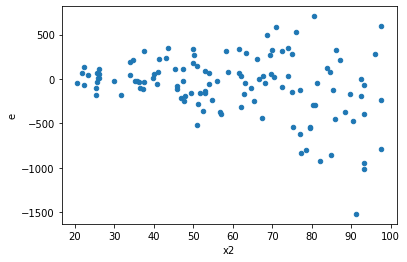

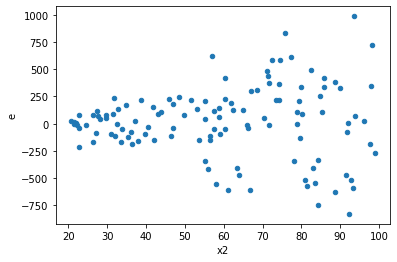

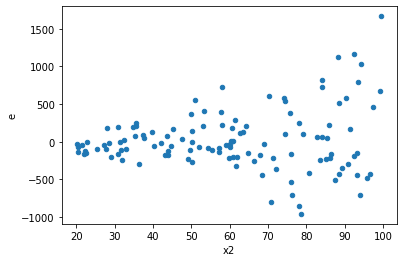

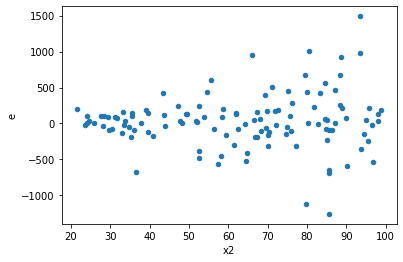

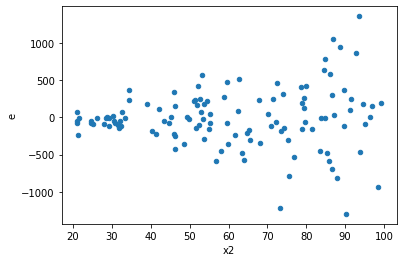

In [17]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,46.0,46.0,1300407.5403098236,8924612.297483644,28269.729137170078,194013.31081486182,6.862934903743595,1.1992873361066358e-09,0.9999999994003563,5.996436680533179e-10,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,1279758.3055828954,14773620.008784885,27820.832730062943,321165.6523648888,11.544070426685686,7.815970093361102e-14,0.9999999999999609,3.907985046680551e-14,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,2894970.3510908405,10134088.180889033,62934.13806719219,220306.2648019355,3.5005844453883452,4.142754201597043e-05,0.999979286228992,2.0713771007985216e-05,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,1483602.6410363712,14159918.182284325,32252.231326877634,307824.3083105288,9.54427943886168,3.0033753262159735e-12,0.9999999999984983,1.5016876631079867e-12,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,5121734.255376541,6831556.361649764,111342.0490299248,148512.09481847312,1.3338365524291576,0.33209622261933314,0.8339518886903334,0.16604811130966657,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,5568479.305190067,8572749.39874122,121053.8979389145,186364.11736393956,1.5395135599679866,0.1471452058841558,0.9264273970579221,0.0735726029420779,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,1416586.831919372,8771422.91125529,30795.365911290697,190683.10676641937,6.191941583538971,7.01823665849588e-09,0.9999999964908817,3.50911832924794e-09,Reject001=0 : Heteroscedasticity
9.0,46.0,46.0,3007562.792499971,8599534.417221121,65381.79983695589,186946.4003743722,2.8593033663888843,0.000526263747740785,0.9997368681261296,0.0002631318738703925,Reject001=0 : Heteroscedasticity
10.0,46.0,46.0,3603315.5122421947,9054253.808406748,78332.94591830859,196831.60453058148,2.512756315022955,0.0022474324454326844,0.9988762837772837,0.0011237162227163422,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,9789668.927713886,1415409.3230371852,212818.88973291055,30769.767892112723,0.1445819397457107,1.047191062082912e-09,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,1300407.5403098236,8924612.297483644,28269.729137170078,194013.31081486182,6.862934903743595,1.1992873361066358e-09,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,1279758.3055828954,14773620.008784885,27820.832730062943,321165.6523648888,11.544070426685686,7.815970093361102e-14,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,2894970.3510908405,10134088.180889033,62934.13806719219,220306.2648019355,3.5005844453883452,4.142754201597043e-05,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,1483602.6410363712,14159918.182284325,32252.231326877634,307824.3083105288,9.54427943886168,3.0033753262159735e-12,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,5121734.255376541,6831556.361649764,111342.0490299248,148512.09481847312,1.3338365524291576,0.33209622261933314,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,8143152.764495853,6457450.048614935,177025.06009773593,140379.34888293338,0.7929913923228137,0.4345528594394,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,5568479.305190067,8572749.39874122,121053.8979389145,186364.11736393956,1.5395135599679866,0.1471452058841558,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,1416586.831919372,8771422.91125529,30795.365911290697,190683.10676641937,6.191941583538971,7.01823665849588e-09,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    680
Reject001=1 : Homoscedasticity      320
Name: Result_test, dtype: int64